In [53]:
## Case Study- Simple Linear Regression

# Insurance Claim Prediction

## Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

## Data Definition

**age** : Age of the policyholder (Numeric)

**sex:** Gender of policyholder (Categoric)

**weight:** Weight of the policyholder (Numeric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**no_of_dependents:** Number of dependent persons on the policyholder (Numeric)

**smoker:** Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**claim:** The amount claimed by the policyholder (Numeric)

**bloodpressure:** Bloodpressure reading of policyholder (Numeric)

**diabetes:** Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

**regular_ex:** A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)

**job_title:** Job profile of the policyholder (Categoric)

**city:** The city in which the policyholder resides (Categoric)

**hereditary_diseases:**  A policyholder suffering from a hereditary diseases or not (Categoric)

#
### Step 1: Import Libraries

In [122]:
# supress warnings

from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' model provides functions for interacting with the operating system
import os

# 'pandas' is used for data manipulation and analysis
import pandas as pd

# 'numpy' id used for mathematical operations on large,multi dimensional arrays and matrices
import numpy as np

# 'Matlplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
# %matplotlib.inline

# 'Seaborn' is based on matplotlib used for statistical graphics
import seaborn as sns

# 'Scikit-learn'(sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# 'Scipy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

### Step 2: Set options

In [55]:
# Display all columns of the dataframe
pd.options.display.max_columns=None

# Display all rows of the dataframe
pd.options.display.max_rows=None

# return an output value upto 6 decimals
pd.options.display.float_format= '{:.6f}'.format

### Step 3: Read Data

In [56]:
# Read csv files using pandas

df_insurance=pd.read_csv(r'C:\Users\Krishna\Desktop\Great learning Gurgaon Feb 2023\Supervised Linear Regression\healthinsurance.csv')

# Display the top 5 rows of the dataframe
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.000000,male,64,24.300000,NoDisease,1,0,NewYork,72,0,0,Actor,13112.600000
1,49.000000,female,75,22.600000,NoDisease,1,0,Boston,78,1,1,Engineer,9567.000000
2,32.000000,female,64,17.800000,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.200000
3,61.000000,female,53,36.400000,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.600000
4,19.000000,female,50,20.600000,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.700000


### Step 4: Data Analysis and preparation

### 4.1 Understand the dataset

#### 4.1.1 Data Dimension

In [57]:
df_insurance.shape

(15000, 13)

#### 4.1.2 Data Types

##### 1. Check data types

In [58]:
df_insurance.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

##### 2. Change the incorrect data types

In [59]:
# convert numeric variable 'smoker' to object(categorical) variable
df_insurance['smoker']= df_insurance['smoker'].astype('object')

# convert numeric variable 'diabetes' to object(categorical) variable
df_insurance['diabetes']= df_insurance['diabetes'].astype('object')

# convert numeric variable 'regular_ex' to object(categorical) varibale
df_insurance['regular_ex']= df_insurance['regular_ex'].astype('object')

##### 3. Recheck the data types after conversion

In [60]:
df_insurance.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
city                    object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

Now the data types are as data definition. Now we can proceed with the data analysis

##### 4.1.3  Summary Statistics

In [61]:
# Describe the numerical data

df_insurance.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,68.650133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,19.418515,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,71.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


In [62]:
# Describe the categorical data

df_insurance.describe(include='object')

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,NewOrleans,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


#### 4.1.4  Missing Values

In [63]:
# Find total missing values

Missing_vals= df_insurance.isnull().sum().sort_values(ascending=False)
Missing_vals

bmi                    956
age                    396
sex                      0
weight                   0
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [64]:
# Find the percent of missing values
Percent= (df_insurance.isnull().sum()*100/df_insurance.isnull().count()).sort_values(ascending=False)

# concat the 'Missing_vals' and 'Percent' columns using 'concat' function
missing_data= pd.concat([Missing_vals, Percent], axis=1, keys=['Missing values','Percentage of missing vlaues'])
missing_data

,Missing values,Percentage of missing vlaues
bmi,956,6.373333
age,396,2.640000
sex,0,0.000000
weight,0,0.000000
hereditary_diseases,0,0.000000
no_of_dependents,0,0.000000
smoker,0,0.000000
city,0,0.000000
bloodpressure,0,0.000000
diabetes,0,0.000000


The missing values are present in the data for the variables `age` and `bmi`. There are 396(2.6%) missing values for the 
variable 'age' and 956(6.4%) for the variable 'bmi'.

In [65]:
# Deal with missing values for the variable 'age'

df_insurance['age'].groupby(df_insurance['sex'], axis=0).mean()

sex
female   39.361040
male     39.738395
Name: age, dtype: float64

The average age for the male and female is nearly the same. We will fill the missing values with the mean age of the policyholder

In [66]:
df_insurance['age'].fillna(df_insurance['age'].mean(), inplace=True)

In [67]:
# Deal with missing values for the variable 'bmi'

df_insurance['bmi'].mean()

30.266412702933152

In [68]:
# Fill the missing values with the mean value of 'bmi' using fillna()

df_insurance['bmi'].fillna(df_insurance['bmi'].mean(), inplace=True)

We have seen that the minimum bloodpressure is 0, which is meaningless. It implies that these are missing values. Let us replace these missing values with the median value.

In [69]:
# Calculate the median of the bloodpressure using median()
median_bloodpressure= df_insurance['bloodpressure'].median()


# Replace the zero values by median bloodpressure values
df_insurance['bloodpressure']= df_insurance['bloodpressure'].replace(0,median_bloodpressure)

Recheck the summary statistics to confirm the missing value treatment for the variable 'bloodpressure'

In [71]:
df_insurance.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,72.228533,13401.437620
std,13.829705,13.701935,5.924606,1.228469,11.269793,12148.239619
min,18.000000,34.000000,16.000000,0.000000,40.000000,1121.900000
25%,27.000000,54.000000,25.900000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.800000,1.000000,71.000000,9545.650000
75%,51.000000,76.000000,34.100000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


#### 4.1.5 Correlation

In [72]:
# Filter out the numeric columns

df_numeric_features= df_insurance.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

In [76]:
import seaborn as sns

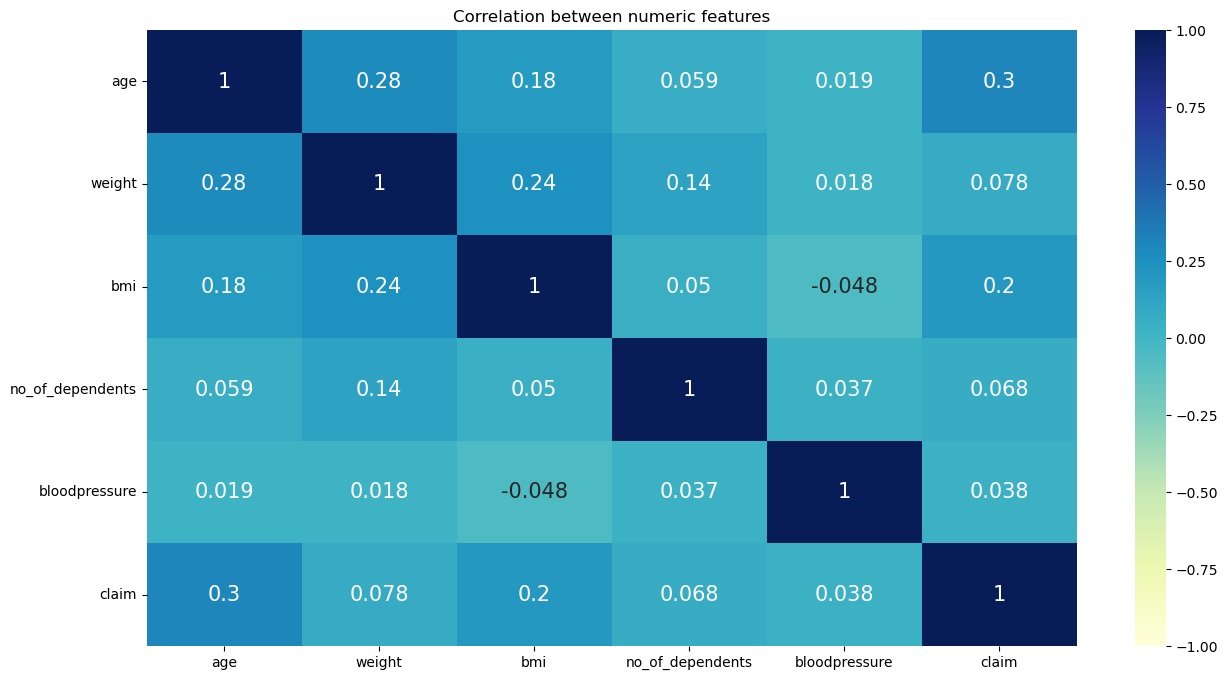

In [77]:
# Plot the heatmap

plt.figure(figsize=(15,8))

sns.heatmap(df_numeric_features.corr(), cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot=True, annot_kws={"size":15},)
plt.title('Correlation between numeric features')
plt.show()

#### 4.1.6    Analyse categorical variable

In [78]:
df_insurance.describe(include='object')

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,NewOrleans,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


There are 7 categorical variables. From the output we see that the varibale `city` has the most number of categories- 91 cities,
of which New Orleans has highest frequency.

Lets visualize the variables. However, we shall exclude the variable `city` from it

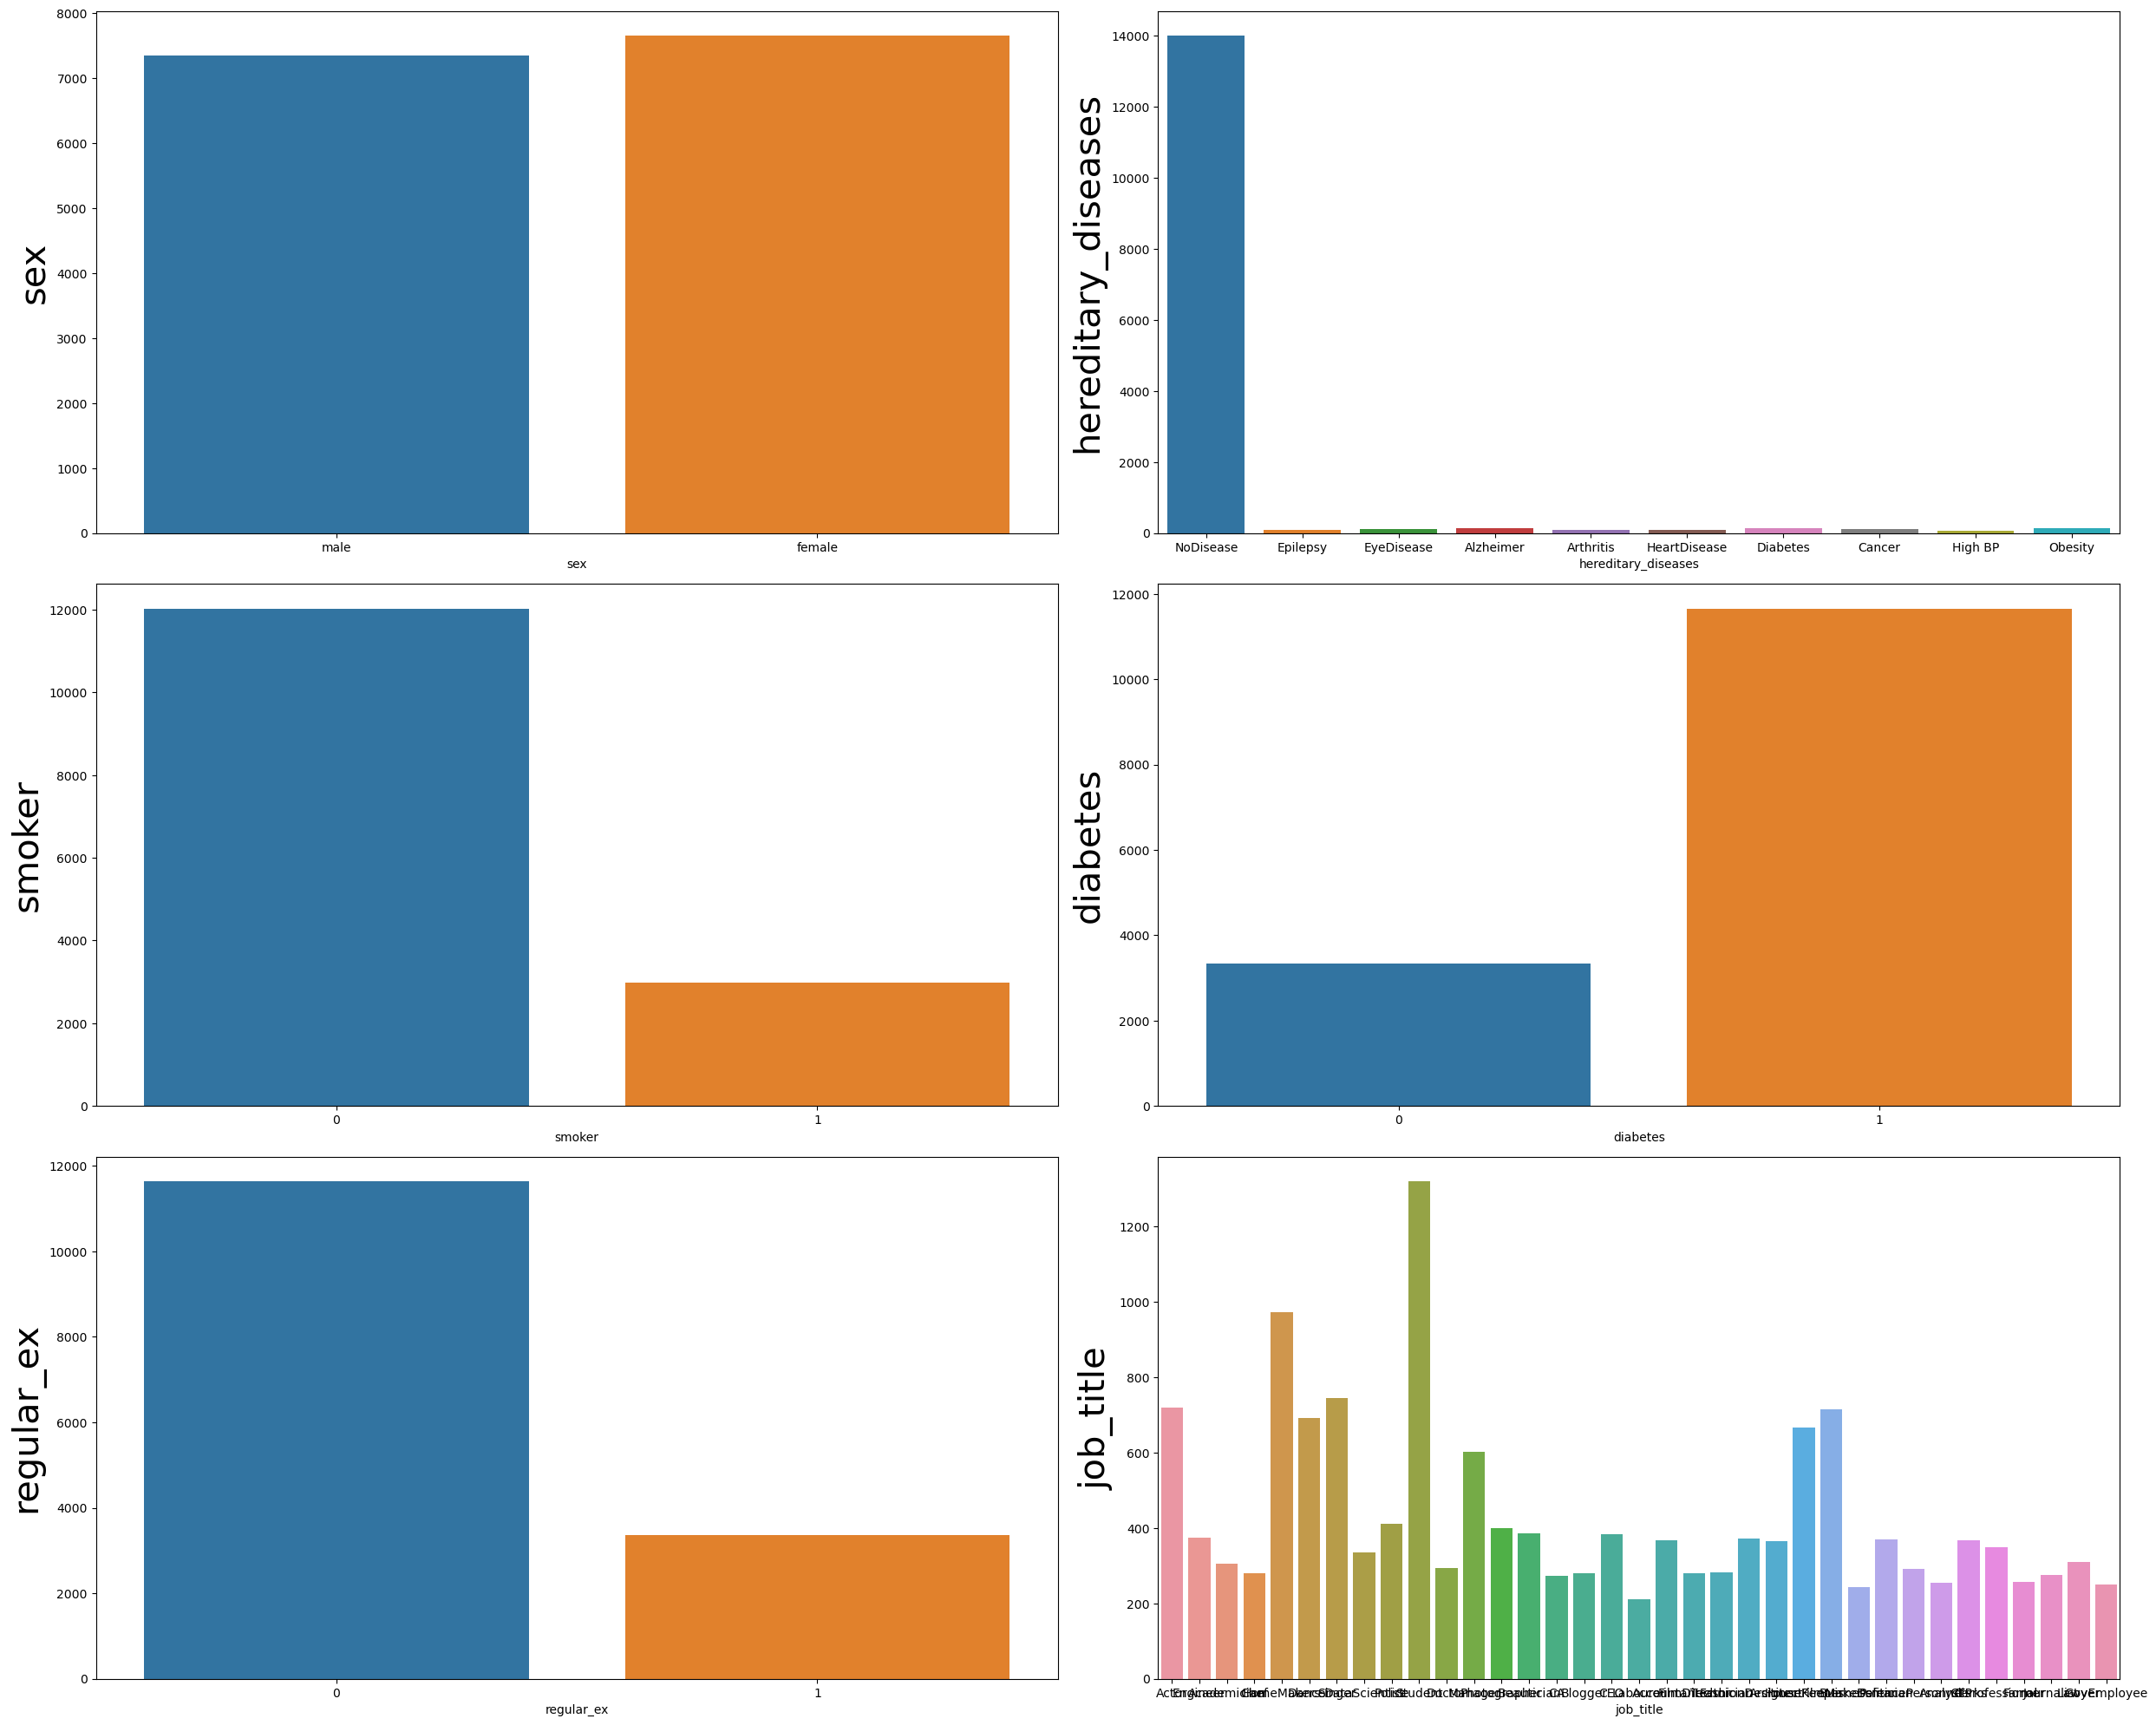

In [79]:
# create a list of all categorical variables
df_categorical_features= df_insurance.select_dtypes(include='object').drop(['city'], axis=1)

# plot the count distribution for each categorical variable
fig, ax= plt.subplots(3,2, figsize=(25,20))

# plot a count plot for all categorical varibales
for variable, subplot in zip(df_categorical_features, ax.flatten()):
    countplot= sns.countplot(df_insurance[variable], ax=subplot)
    countplot.set_ylabel(variable, fontsize=30)
    
plt.tight_layout()
plt.show()

Now consider the variable `city`

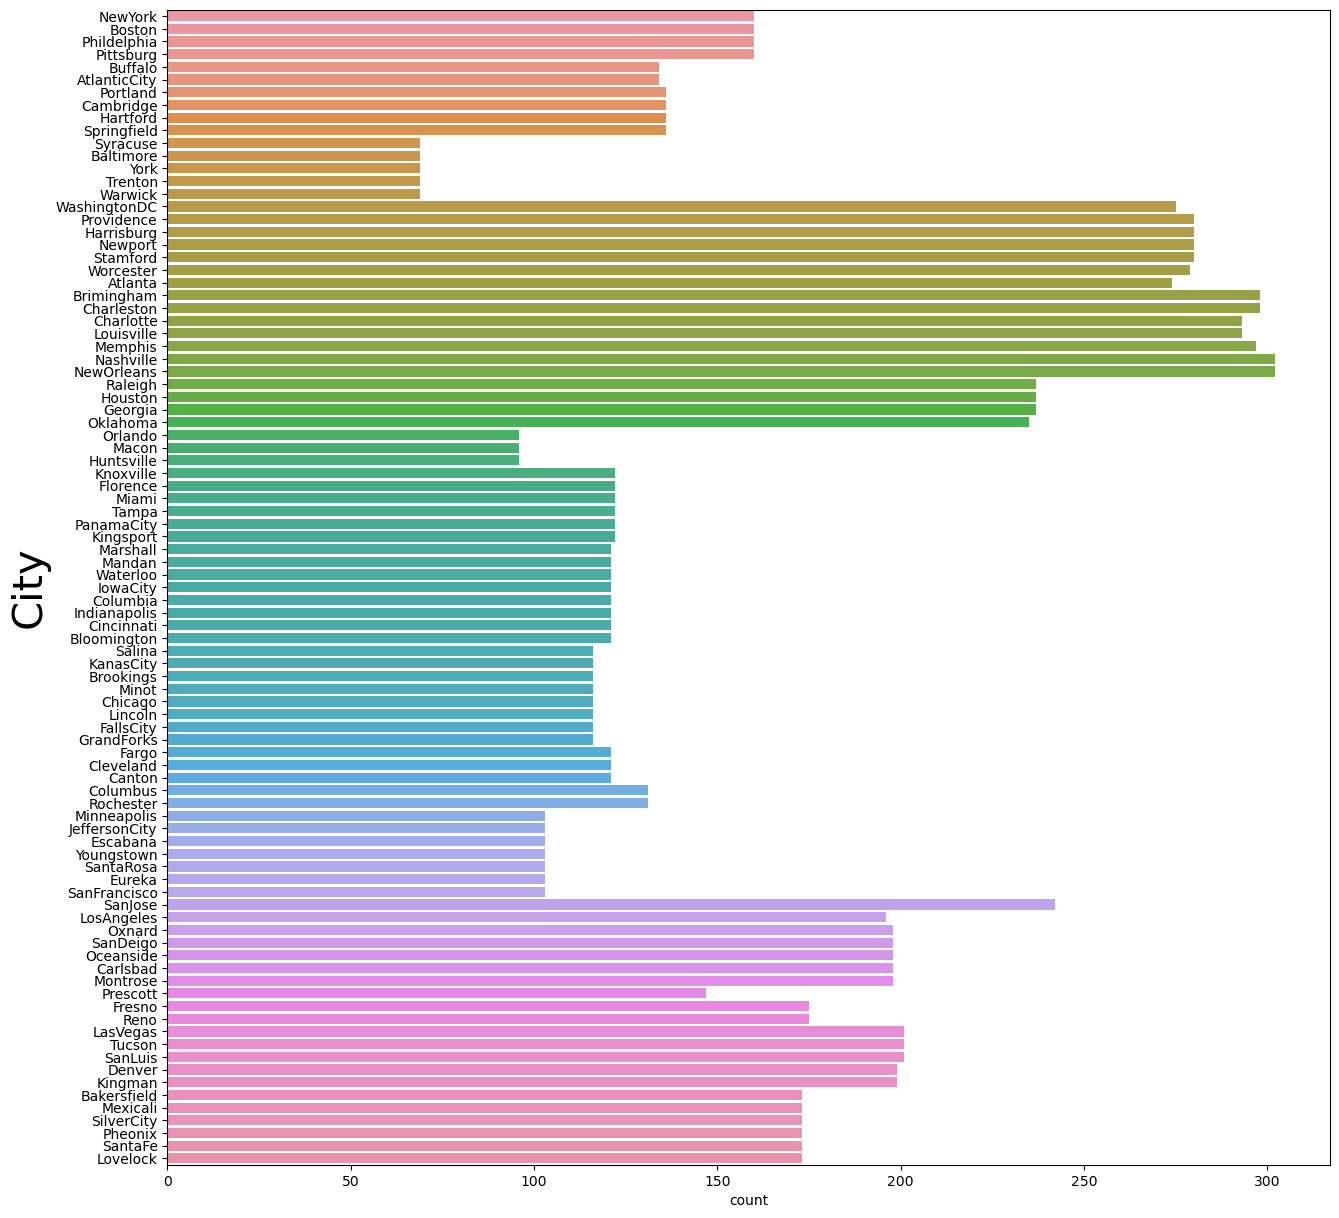

In [82]:
# set the figure size
plt.figure(figsize=(15,15))
countplot= sns.countplot(y=df_insurance['city'], orient='h')
countplot.set_ylabel('City', fontsize=30)
plt.show()

#### 4.1.7 Analyse relationship between target and categorical variables

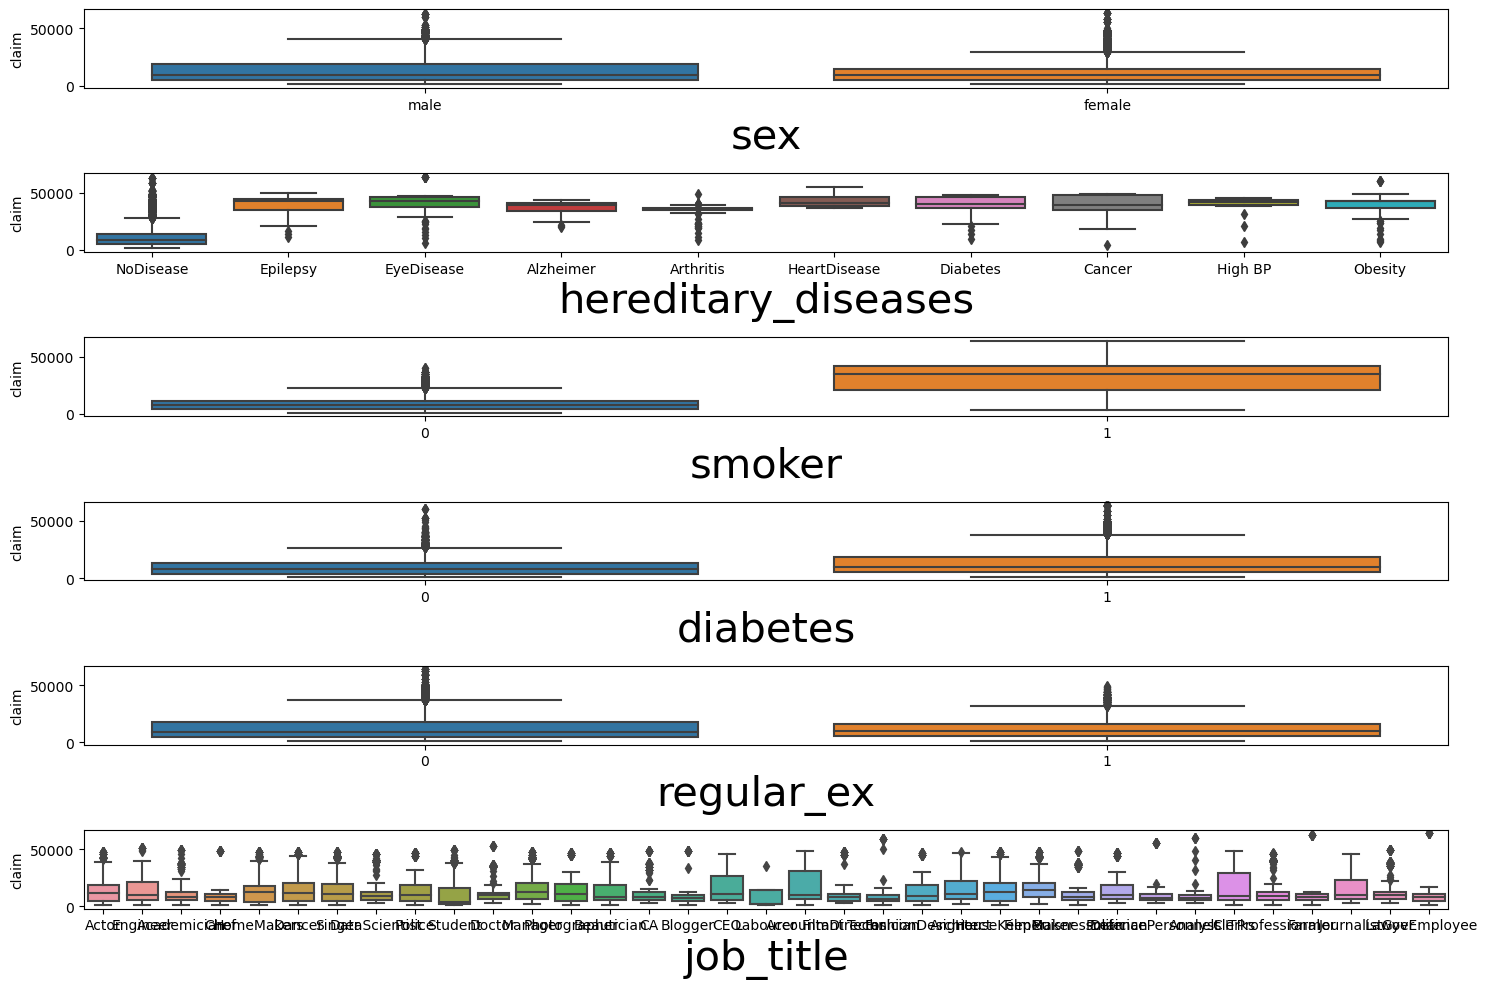

In [83]:
# Plot the boxplot for each categorical variable

fig,ax = plt.subplots(6,1, figsize=(15,10))

for variable, subplot in zip(df_categorical_features, ax.flatten()):
    boxplt= sns.boxplot(x=variable, y='claim', data=df_insurance, ax=subplot)
    
    boxplt.set_xlabel(variable, fontsize=30)
    
plt.tight_layout()
plt.show()

Since the variable `city` has 91 categories, we shall plot it seperately

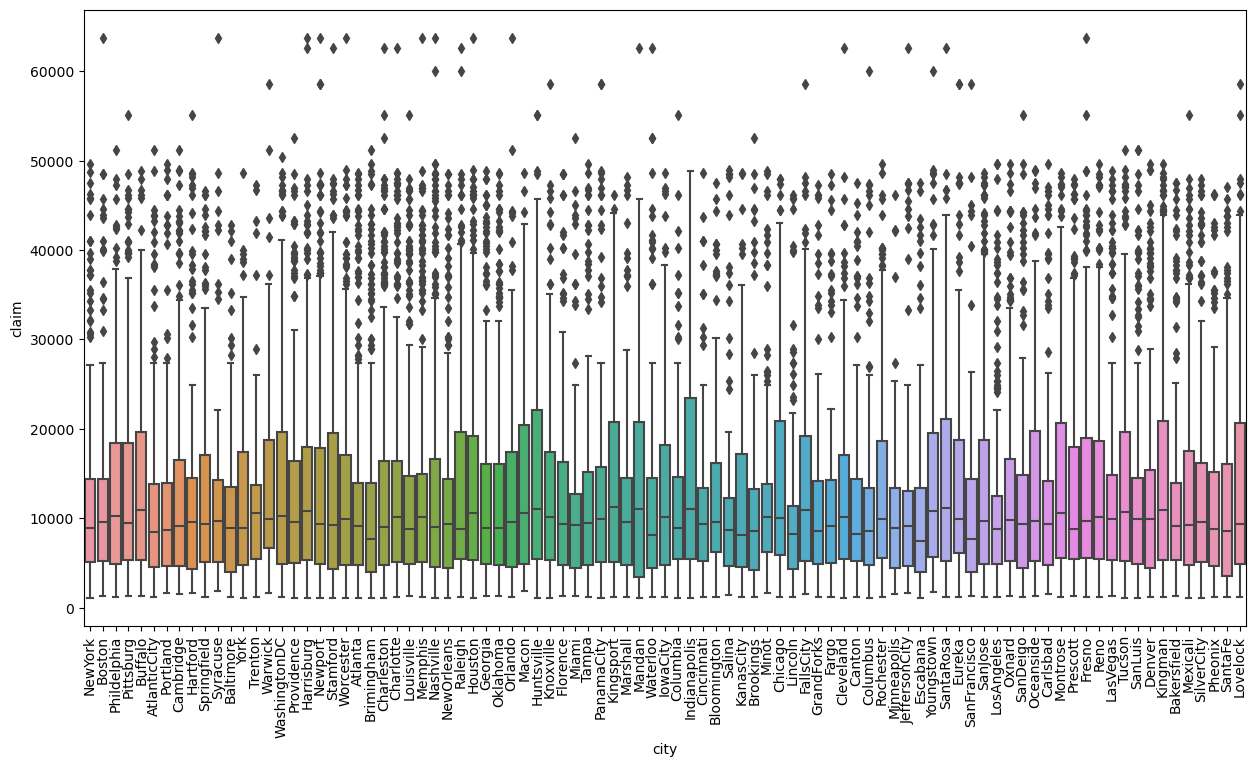

In [85]:
plt.figure(figsize=(15,8))
ax=sns.boxplot(x=df_insurance['city'], y=df_insurance['claim'], data=df_insurance)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=10)
plt.show()

#### 4.1.8 Feature Engineering

Create a new feature 'region' by combining the cities

**There are 91 unique cities. We will divide these cities into North-East, West, Mid-West and south regions**

Lets create a new variable region. We will replace the original variable `city` with it.

In [98]:
# create a region column and combine the north-east cities
df_insurance['region'] = df_insurance['city'].replace(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
                                                       'AtlanticCity','Portland', 'Cambridge', 'Hartford', 
                                                       'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton',
                                                       'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg',
                                                       'Newport', 'Stamford', 'Worcester'],
                                                      'North-East')

In [99]:
# combine all the southern cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
                                                         'Louisville', 'Memphis', 'Nashville', 'NewOrleans',
                                                         'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando',
                                                         'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami',
                                                         'Tampa', 'PanamaCity', 'Kingsport', 'Marshall'],
                                                         'Southern')

In [100]:
# combine all the mid-west cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Mandan', 'Waterloo', 'IowaCity', 'Columbia',
                                                         'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
                                                         'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
                                                         'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 
                                                         'Canton', 'Columbus', 'Rochester', 'Minneapolis', 
                                                         'JeffersonCity', 'Escabana','Youngstown'],
                                                         'Mid-West')

In [101]:
# combine all the western cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose',
                                                         'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside', 
                                                         'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
                                                         'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
                                                         'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix',
                                                         'SantaFe', 'Lovelock'],
                                                         'West')

In [102]:
# Check the unique values of the region
df_insurance['region'].unique()

array(['North-East', 'Southern', 'Mid-West', 'West'], dtype=object)

In [103]:
df_insurance['region'].value_counts()

Southern      4444
West          4273
North-East    3471
Mid-West      2812
Name: region, dtype: int64

In [104]:
# drop the 'city' variable from the dataset using drop()
df_insurance= df_insurance.drop(['city'], axis=1)

In [105]:
# Check whether the new variable added into the data frame or not
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,region
0,60.000000,male,64,24.300000,NoDisease,1,0,72,0,0,Actor,13112.600000,North-East
1,49.000000,female,75,22.600000,NoDisease,1,0,78,1,1,Engineer,9567.000000,North-East
2,32.000000,female,64,17.800000,Epilepsy,2,1,88,1,1,Academician,32734.200000,North-East
3,61.000000,female,53,36.400000,NoDisease,1,1,72,1,0,Chef,48517.600000,North-East
4,19.000000,female,50,20.600000,NoDisease,0,0,82,1,0,HomeMakers,1731.700000,North-East


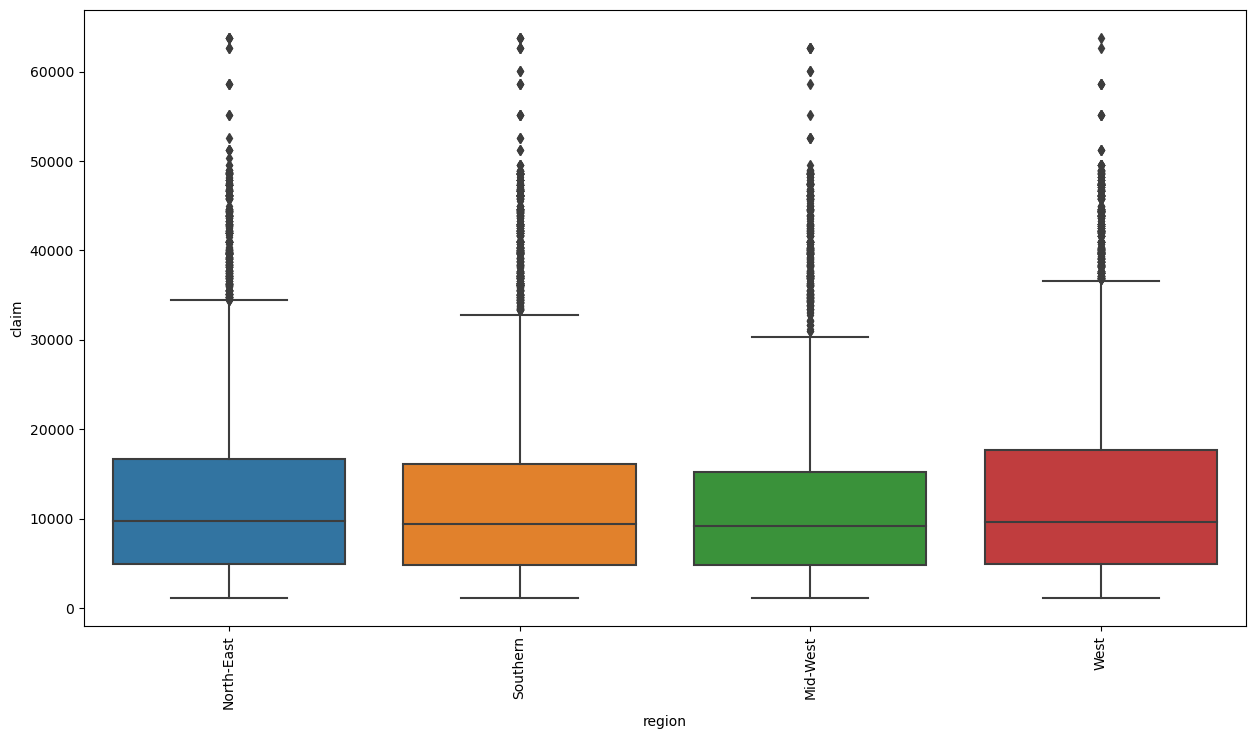

In [106]:
#### Analyse relationship between region and claim variable
plt.figure(figsize=(15,8))
ax=sns.boxplot(x='region', y='claim', data=df_insurance)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

The plot shows that there is not much significant difference in the variance of the insurance claim across the regions.

In [ ]:
The plot shows that there is not much significant difference in the variance of the insurance claim across the regions.

### 4.1.9 Discover Outliers

**1. Plot boxplot for numerical data**

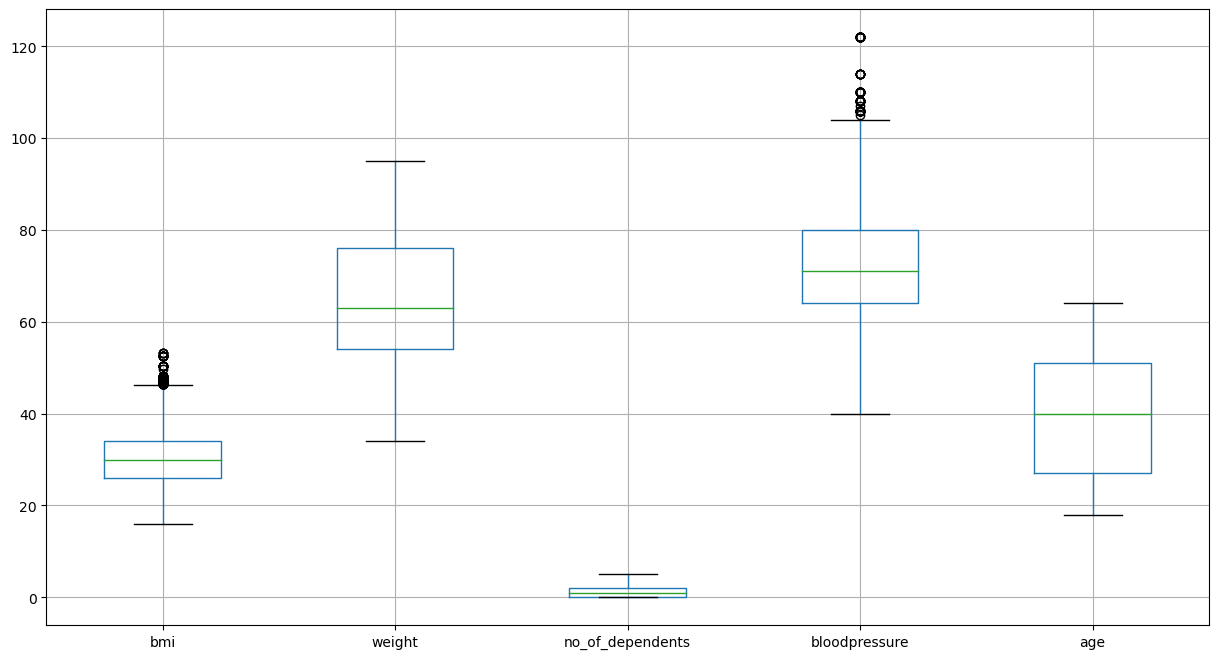

In [107]:
plt.rcParams['figure.figsize']=(15,8)
df_numeric_features.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])
plt.show()

**2. Note the variables for which outliers are present**

From the above plot, we notice that for the variable 'bmi' and 'bloodpressure' contain outliers

**3. Remove outliers by IQR method**

In [108]:
# calculate interquartile range 

Q1 = df_numeric_features.drop(['claim'], axis=1).quantile(0.25)


Q3 = df_numeric_features.drop(['claim'], axis=1).quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1
print(IQR)

age                24.000000
weight             22.000000
bmi                 8.200000
no_of_dependents    2.000000
bloodpressure      16.000000
dtype: float64


In [109]:
df_insurance = df_insurance[~((df_insurance < (Q1 - 1.5 * IQR)) | (df_insurance > (Q3 + 1.5 * IQR))).any(axis=1)]

A simple way to know whether the outliers have been removed or not is to check the dimensions of the data. 

In [110]:
# check the shape of data using shape
df_insurance.shape

(14723, 13)

There is a reduction in the number of rows(from 15000 to 14723).

**4. Plot boxplot to recheck for outliers**

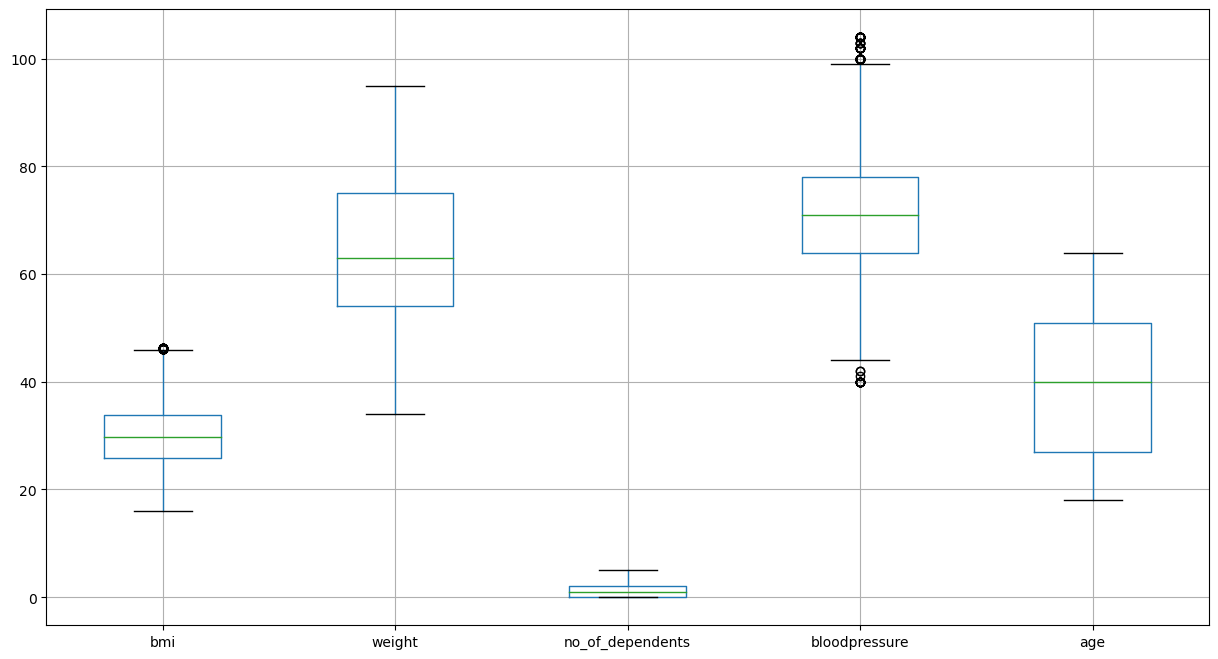

In [111]:
plt.rcParams['figure.figsize']=(15,8)

df_insurance.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that you see are moderate outliers that lie within the min/max range before removing the actual outliers

### 4.1.10 Recheck the Correlation

In [113]:
df_numeric_features = df_insurance.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

In [114]:
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,age,weight,bmi,no_of_dependents,bloodpressure,claim
age,1.000000,0.282136,0.196479,0.056423,0.023431,0.301544
weight,0.282136,1.000000,0.237473,0.134033,0.009877,0.080363
bmi,0.196479,0.237473,1.000000,0.044997,-0.055260,0.196193
no_of_dependents,0.056423,0.134033,0.044997,1.000000,0.027358,0.077775
bloodpressure,0.023431,0.009877,-0.055260,0.027358,1.000000,0.036679
claim,0.301544,0.080363,0.196193,0.077775,0.036679,1.000000


**3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

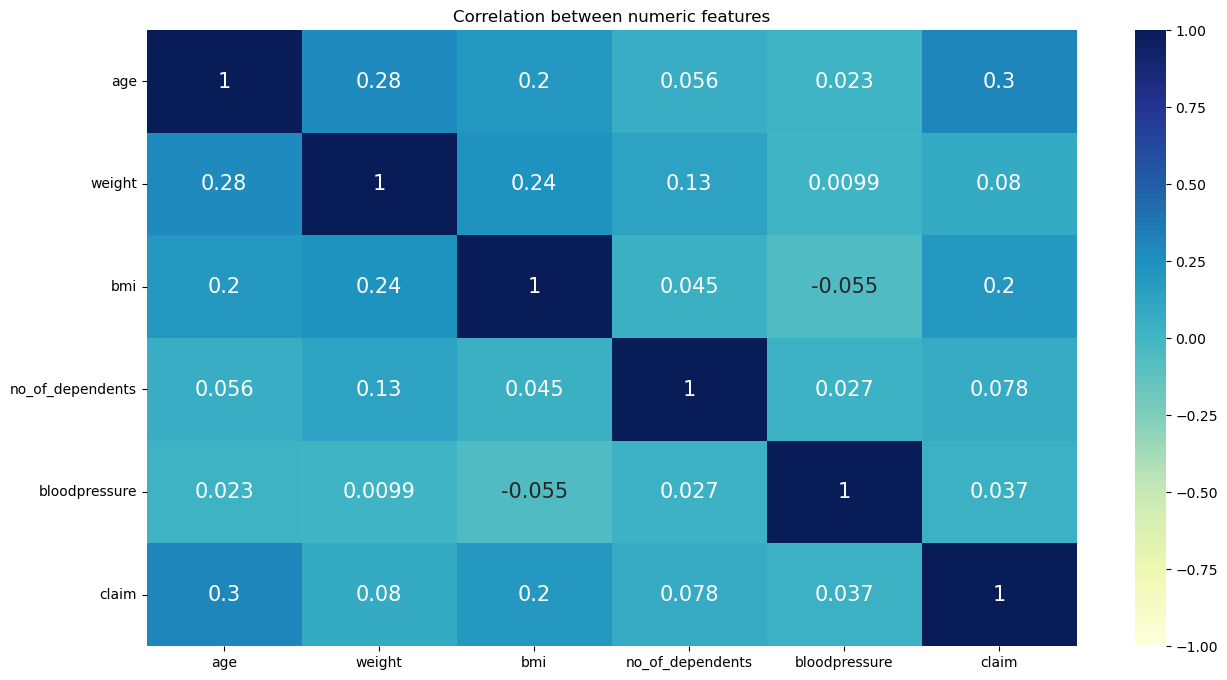

In [115]:
plt.figure(figsize=(15, 8))

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15})
plt.title('Correlation between numeric features')
plt.show()

**4. Check multicollinearity using VIF**

In [123]:
df_numeric_X =  df_numeric_features.drop('claim',axis=1)
df_numeric_X = sm.add_constant(df_numeric_X)
vif_value = [VIF(df_numeric_X.values, i) for i in range(df_numeric_X.shape[1])]
pd.DataFrame(vif_value, columns=['VIF_Value'], index=df_numeric_X.columns).sort_values('VIF_Value', ascending=False)

,VIF_Value
const,91.123639
weight,1.145123
age,1.109198
bmi,1.085094
no_of_dependents,1.019531
bloodpressure,1.005250


VIF Values indicate that there is no multi collinearity

## 4.2 Prepare the Data

### 4.2.1 Check for Normality

As per the assumptions of linear regression, residuals (actual values - predicted values) should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for target variable.

**1. Plot a histogram and also perform the Jarque-Bera test**

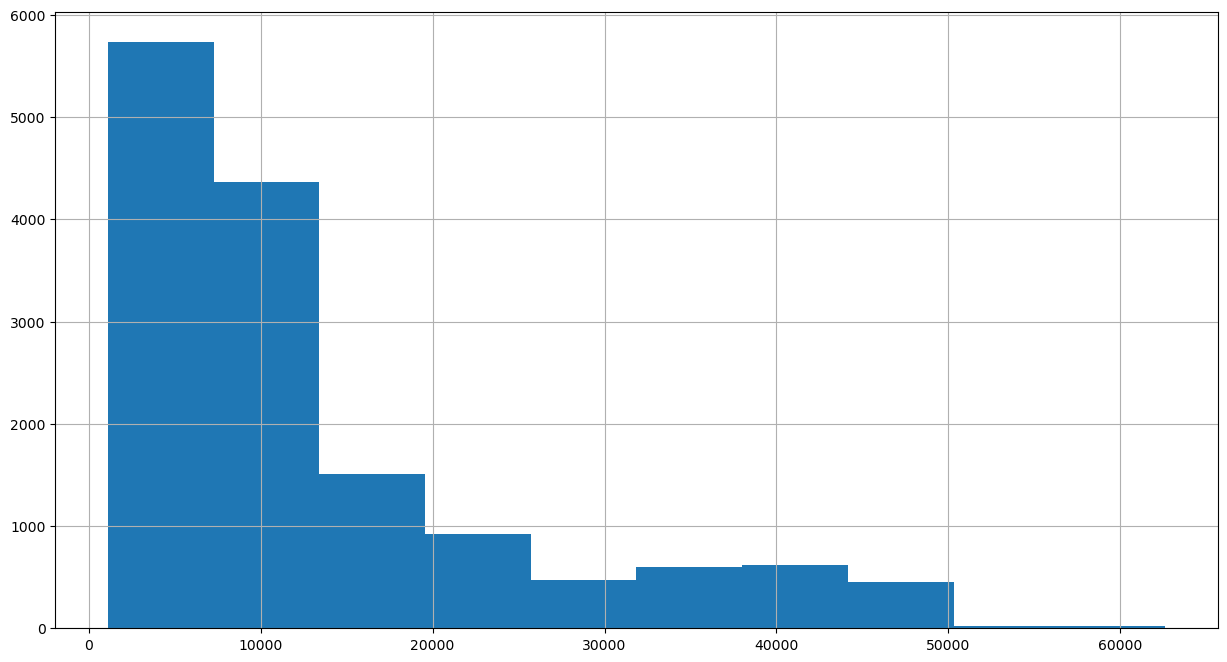

In [124]:
df_insurance.claim.hist()
plt.show()

In [126]:
stat, p = jarque_bera(df_insurance["claim"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=6571.030, p-value=0.000
The data is not normally distributed (reject H0)


**2. If the data is not normally distributed, use log transformation to get near normally distributed data**

In [128]:
# log transformation for normality using np.log()
df_insurance['log_claim'] = np.log(df_insurance['claim'])
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,region,log_claim
0,60.000000,male,64,24.300000,NoDisease,1,0,72,0,0,Actor,13112.600000,North-East,9.481329
1,49.000000,female,75,22.600000,NoDisease,1,0,78,1,1,Engineer,9567.000000,North-East,9.166075
2,32.000000,female,64,17.800000,Epilepsy,2,1,88,1,1,Academician,32734.200000,North-East,10.396176
3,61.000000,female,53,36.400000,NoDisease,1,1,72,1,0,Chef,48517.600000,North-East,10.789682
4,19.000000,female,50,20.600000,NoDisease,0,0,82,1,0,HomeMakers,1731.700000,North-East,7.456859


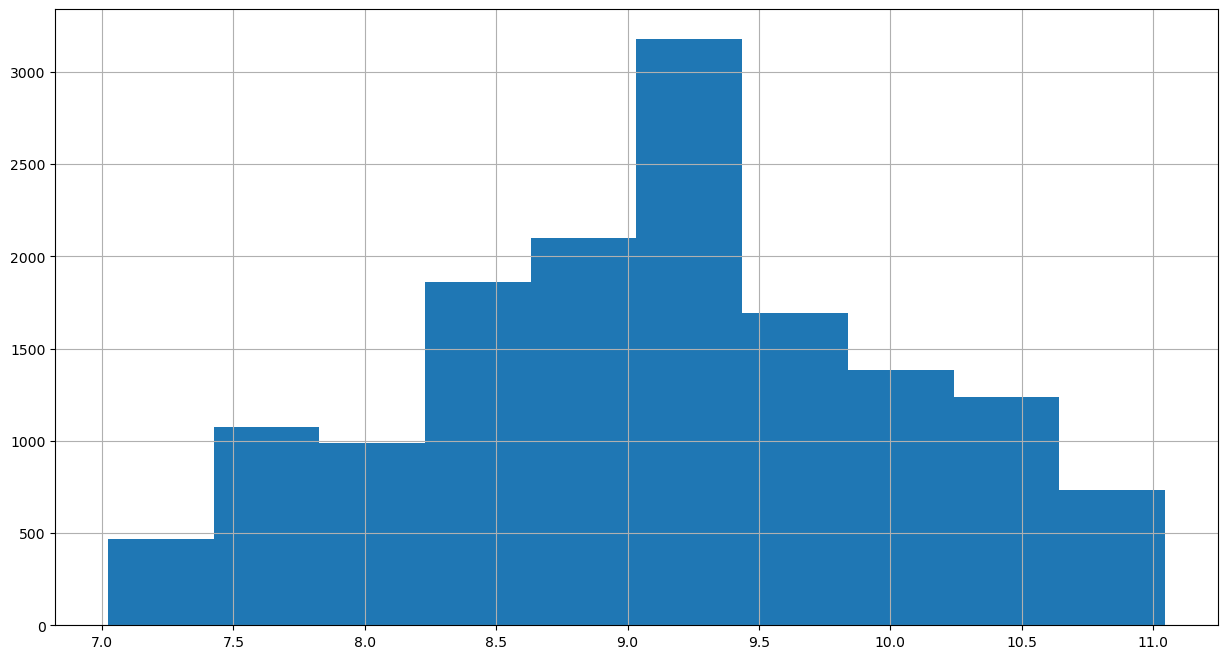

In [129]:
# recheck for normality 
df_insurance.log_claim.hist()
plt.show()

In [130]:
statn, pv = jarque_bera(df_insurance['log_claim'])
print('Statistics=%.3f, p-value=%.3f' % (statn, pv))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=244.187, p-value=0.000
The data is not normally distributed (reject H0)


It can be visually seen that the data has near-normal distribution, but Jarque Bera test does not support the claim.
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs


### 4.2.3 Dummy Encoding of Categorical Variables

**1. Filter numerical and categorical variables**

In [132]:
# filter the numerical features in the dataset using select_dtypes()
df_numeric_features = df_insurance.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim',
       'log_claim'],
      dtype='object')

In [133]:
# Perform scaling on numric predictor variables
df_numeric_features.iloc[:, 0:5] = df_numeric_features.iloc[:, 0:5].apply(lambda rec: (rec - rec.mean()) / rec.std())

In [134]:
# filter the categorical features in the dataset using select_dtypes()
df_categoric_features = df_insurance.select_dtypes(include=[object])
df_categoric_features.columns

Index(['sex', 'hereditary_diseases', 'smoker', 'diabetes', 'regular_ex',
       'job_title', 'region'],
      dtype='object')

**2. Dummy encode the catergorical variables**

In [135]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_categoric_features.columns.values:
    
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    
    # concatenate the categoric features with dummy variables using concat()
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    
    # drop the orginal categorical variable from the dataframe
    df_categoric_features.drop([col], axis=1, inplace=True)

**3. Concatenate numerical and dummy encoded categorical variables**

In [139]:
df_insurance_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)
df_insurance_dummy.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
0,1.471342,-0.057179,-1.020567,-0.097254,0.011458,13112.600000,9.481329,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.678721,0.747855,-1.320373,-0.097254,0.574420,9567.000000,9.166075,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.546239,-0.057179,-2.166884,0.721891,1.512688,32734.200000,10.396176,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.543399,-0.862213,1.113346,-0.097254,0.011458,48517.600000,10.789682,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.482974,-1.081768,-1.673086,-0.916398,0.949727,1731.700000,7.456859,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 5. Linear Regression (OLS)


### 5.1 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

**1. Split the data into training and test sets**

In [140]:
df_insurance_dummy = sm.add_constant(df_insurance_dummy)

# Define X and Y
X = df_insurance_dummy.drop(['claim','log_claim'], axis=1)
y = df_insurance_dummy[['log_claim','claim']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (11042, 56)
The shape of X_test is: (3681, 56)
The shape of y_train is: (11042, 2)
The shape of y_test is: (3681, 2)


In [142]:
linreg_full_model_withlog = sm.OLS(y_train["log_claim"], X_train).fit()

print(linreg_full_model_withlog.summary())

                            OLS Regression Results                            
Dep. Variable:              log_claim   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     584.1
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:29:47   Log-Likelihood:                -7083.9
No. Observations:               11042   AIC:                         1.428e+04
Df Residuals:                   10986   BIC:                         1.469e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**3. Predict the values using test set**

In [143]:
# predict the 'log_claim' using predict()
linreg_full_model_withlog_predictions = linreg_full_model_withlog.predict(X_test)

In [145]:
# In order to get claim values, we take the antilog of these predicted values by using the function np.exp()

predicted_claim = np.exp(linreg_full_model_withlog_predictions)


# extract the 'claim' values from the test data
actual_claim = y_test['claim']

**4. Compute accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [146]:
linreg_full_model_withlog_rmse = rmse(actual_claim, predicted_claim)
linreg_full_model_withlog_rsquared = linreg_full_model_withlog.rsquared
linreg_full_model_withlog_rsquared_adj = linreg_full_model_withlog.rsquared_adj

**5. Tabulate the results**

In [149]:
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [ ]:
# compile the required information
linreg_full_model_withlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model with log of target variable",
                     'RMSE':linreg_full_model_withlog_rmse,
                     'R-Squared': linreg_full_model_withlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withlog_rsquared_adj 
                  # 'Test_R-Squared': linreg_full_model_withlog_test_rsquared    # for Test-RSquared
                   })

score_card = score_card.append(linreg_full_model_withlog_metrics, ignore_index=True)
score_card

### 5.2 Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

**1. Build model using sm.OLS().fit()**

In [150]:
# build a full model using OLS()
linreg_full_model_withoutlog = sm.OLS(y_train['claim'], X_train).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     651.8
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:33:40   Log-Likelihood:            -1.1150e+05
No. Observations:               11042   AIC:                         2.231e+05
Df Residuals:                   10986   BIC:                         2.235e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Calculate the p-values to know the insignificant variables

In [151]:
linreg_full_model_withoutlog_pvalues = pd.DataFrame(linreg_full_model_withoutlog.pvalues, columns=["P-Value"])

linreg_full_model_withoutlog_pvalues

,P-Value
const,0.000000
age,0.000000
weight,0.000000
bmi,0.000000
no_of_dependents,0.000000
bloodpressure,0.000001
sex_male,0.991378
hereditary_diseases_Arthritis,0.007119
hereditary_diseases_Cancer,0.437347
hereditary_diseases_Diabetes,0.007693


The above table shows the p-values for all the variables to decide the significant variables

Let's create a list of insignificant variables

In [152]:
linreg_full_model_withoutlog_pvalues[linreg_full_model_withoutlog_pvalues['P-Value']  <= 0.05]

,P-Value
const,0.000000
age,0.000000
weight,0.000000
bmi,0.000000
no_of_dependents,0.000000
bloodpressure,0.000001
hereditary_diseases_Arthritis,0.007119
hereditary_diseases_Diabetes,0.007693
hereditary_diseases_EyeDisease,0.010019
hereditary_diseases_HeartDisease,0.000001


In [153]:
# select insignificant variables
insignificant_variables = linreg_full_model_withoutlog_pvalues[
                                                        linreg_full_model_withoutlog_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_var = insignificant_variables.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
insigni_var

['sex_male',
 'hereditary_diseases_Cancer',
 'hereditary_diseases_Epilepsy',
 'hereditary_diseases_Obesity',
 'job_title_Accountant',
 'job_title_Actor',
 'job_title_Architect',
 'job_title_Beautician',
 'job_title_Blogger',
 'job_title_Buisnessman',
 'job_title_CA',
 'job_title_CEO',
 'job_title_Chef',
 'job_title_Clerks',
 'job_title_Dancer',
 'job_title_DefencePersonnels',
 'job_title_Farmer',
 'job_title_FashionDesigner',
 'job_title_FilmDirector',
 'job_title_FilmMaker',
 'job_title_GovEmployee',
 'job_title_HomeMakers',
 'job_title_HouseKeeper',
 'job_title_ITProfessional',
 'job_title_Journalist',
 'job_title_Labourer',
 'job_title_Lawyer',
 'job_title_Police',
 'job_title_Technician',
 'region_North-East',
 'region_Southern',
 'region_West']

**2. Predict the values using test set**

In [178]:
# predict the claim using predict()
predicted_claim = linreg_full_model_withoutlog.predict(X_test)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

**3. Compute model accuracy measures**

In [179]:
# calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared
# linreg_full_model_withoutlog_test_rsquared = r2_score(actual_claim, predicted_claim)

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj 

**4. Tabulate the results**

In [180]:
linreg_full_model_withoutlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model without log of target variable",
                     'RMSE':linreg_full_model_withoutlog_rmse,
                     'R-Squared': linreg_full_model_withoutlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj
                   })
score_card = score_card.append(linreg_full_model_withoutlog_metrics, ignore_index=True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
1,Linreg full model with significant variables,0.760924,0.760555,5911.155096
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909


<a id='Finetuning'></a>
## 5.3. Fine Tune Linear Regression Model (OLS)

<a id='RemovingInsignificantVariable'></a>
### 5.3.1 Linear Regression after Removing Insignificant Variable (OLS)


**1. Consider the significant variables**

In [181]:
X_train.head()

,const,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1,job_title_Accountant,job_title_Actor,job_title_Analyst,job_title_Architect,job_title_Beautician,job_title_Blogger,job_title_Buisnessman,job_title_CA,job_title_CEO,job_title_Chef,job_title_Clerks,job_title_Dancer,job_title_DataScientist,job_title_DefencePersonnels,job_title_Doctor,job_title_Engineer,job_title_Farmer,job_title_FashionDesigner,job_title_FilmDirector,job_title_FilmMaker,job_title_GovEmployee,job_title_HomeMakers,job_title_HouseKeeper,job_title_ITProfessional,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
1163,1.000000,-0.690352,1.040595,2.294934,0.721891,-1.302118,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5615,1.000000,1.327229,-0.715843,-1.020567,-0.916398,0.199112,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10109,1.000000,1.687512,1.113779,1.201524,-0.916398,0.762073,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3256,1.000000,-1.555030,-0.935398,0.231564,-0.916398,-1.302118,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7087,1.000000,0.030213,1.113779,0.031648,2.360180,1.231208,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [182]:
# drop the insignificant variables
X_significant = df_insurance.drop(["sex","job_title","region","claim","log_claim"], axis=1)

In [183]:
# filter the categorical features in the dataset using select_dtypes()
df_significant_categoric_features = X_significant.select_dtypes(include=[object])
df_significant_categoric_features.columns

Index(['hereditary_diseases', 'smoker', 'diabetes', 'regular_ex'], dtype='object')

**Dummy encode the catergorical variables**

In [184]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_significant_categoric_features.columns.values:
    
    dummy_encoded_variables = pd.get_dummies(df_significant_categoric_features[col], prefix=col, drop_first=True)
    df_significant_categoric_features = pd.concat([df_significant_categoric_features, dummy_encoded_variables],axis=1)
    df_significant_categoric_features.drop([col], axis=1, inplace=True)

**Concatenate numerical and dummy encoded categorical variables**

In [185]:
# concatenate the numerical and dummy encoded categorical variables using concat()
df_insurance_significant = pd.concat([df_numeric_features, df_significant_categoric_features], axis=1)
df_insurance_significant.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim,log_claim,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,smoker_1,diabetes_1,regular_ex_1
0,1.471342,-0.057179,-1.020567,-0.097254,0.011458,13112.600000,9.481329,0,0,0,0,0,0,0,1,0,0,0,0
1,0.678721,0.747855,-1.320373,-0.097254,0.574420,9567.000000,9.166075,0,0,0,0,0,0,0,1,0,0,1,1
2,-0.546239,-0.057179,-2.166884,0.721891,1.512688,32734.200000,10.396176,0,0,0,1,0,0,0,0,0,1,1,1
3,1.543399,-0.862213,1.113346,-0.097254,0.011458,48517.600000,10.789682,0,0,0,0,0,0,0,1,0,1,1,0
4,-1.482974,-1.081768,-1.673086,-0.916398,0.949727,1731.700000,7.456859,0,0,0,0,0,0,0,1,0,0,1,0


**2. Split the data into training and test sets**

In [186]:
# add the intercept column to the dataset
df_insurance_significant = sm.add_constant(df_insurance_significant)

# separate the independent and dependent variables
X = df_insurance_significant.drop(['claim','log_claim'], axis=1)
y = df_insurance_significant[['log_claim','claim']]

# split data into train subset and test subset for predictor and target variables
X_train_significant, X_test_significant, y_train, y_test = train_test_split(X, y, random_state=1)

print("The shape of X_train is:",X_train_significant.shape)
print("The shape of X_test is:",X_test_significant.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (11042, 18)
The shape of X_test is: (3681, 18)
The shape of y_train is: (11042, 2)
The shape of y_test is: (3681, 2)


**1. Build model using sm.OLS().fit()**

In [187]:
# build a full model with significant variables using OLS()
linreg_model_with_significant_var = sm.OLS(y_train['claim'], X_train_significant).fit()

# to print the summary output
print(linreg_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     2064.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:59:47   Log-Likelihood:            -1.1160e+05
No. Observations:               11042   AIC:                         2.232e+05
Df Residuals:                   11024   BIC:                         2.234e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**2. Predict the values using test set**

In [188]:
# predict the 'claim' using predict()
predicted_claim = linreg_model_with_significant_var.predict(X_test_significant)

# extract the 'claim' values from the test data
actual_claim = y_test['claim']

**3. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [189]:
# calculate rmse using rmse()
linreg_model_with_significant_var_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_model_with_significant_var_rsquared = linreg_model_with_significant_var.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_var_rsquared_adj = linreg_model_with_significant_var.rsquared_adj 

**4. Tabulate the results**

In [190]:
# compile the required information
linreg_model_with_significant_var_metrics = pd.Series({
                     'Model_Name': "Linreg full model with significant variables",
                     'RMSE': linreg_model_with_significant_var_rmse,
                     'R-Squared': linreg_model_with_significant_var_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_var_rsquared_adj
                   }) 

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_model_with_significant_var_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
1,Linreg full model with significant variables,0.760924,0.760555,5911.155096
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
3,Linreg full model with significant variables,0.760924,0.760555,5911.155096


### 5.3.2 Check the Assumptions of the Linear Regression

### 5.3.2.1 Detecting Autocorrelation

** Based on Durbin Watson score, we can conclude that there is no autocorrelation**

### 5.3.2.2 Detecting Heteroskedasticity
Breusch-Pagan is the test for detecting heteroskedasticity:

The null and alternate hypothesis of Breusch-Pagan test is as follows:<BR>
    
    H0: The residuals are homoskedastic
    H1: The residuals are not homoskedastic

In [191]:
# create vector of result parmeters
name = ['f-value','p-value']           

# perform Breusch-Pagan test using het_breushpagan()
breuschpagan_score = sms.het_breuschpagan(linreg_model_with_significant_var.resid, linreg_model_with_significant_var.model.exog)
breuschpagan_score


(1015.227307649159,
 4.9767801612946595e-205,
 65.65871887033185,
 1.8559838513533733e-215)

We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data.

### 5.3.2.3 Linearity of Residuals


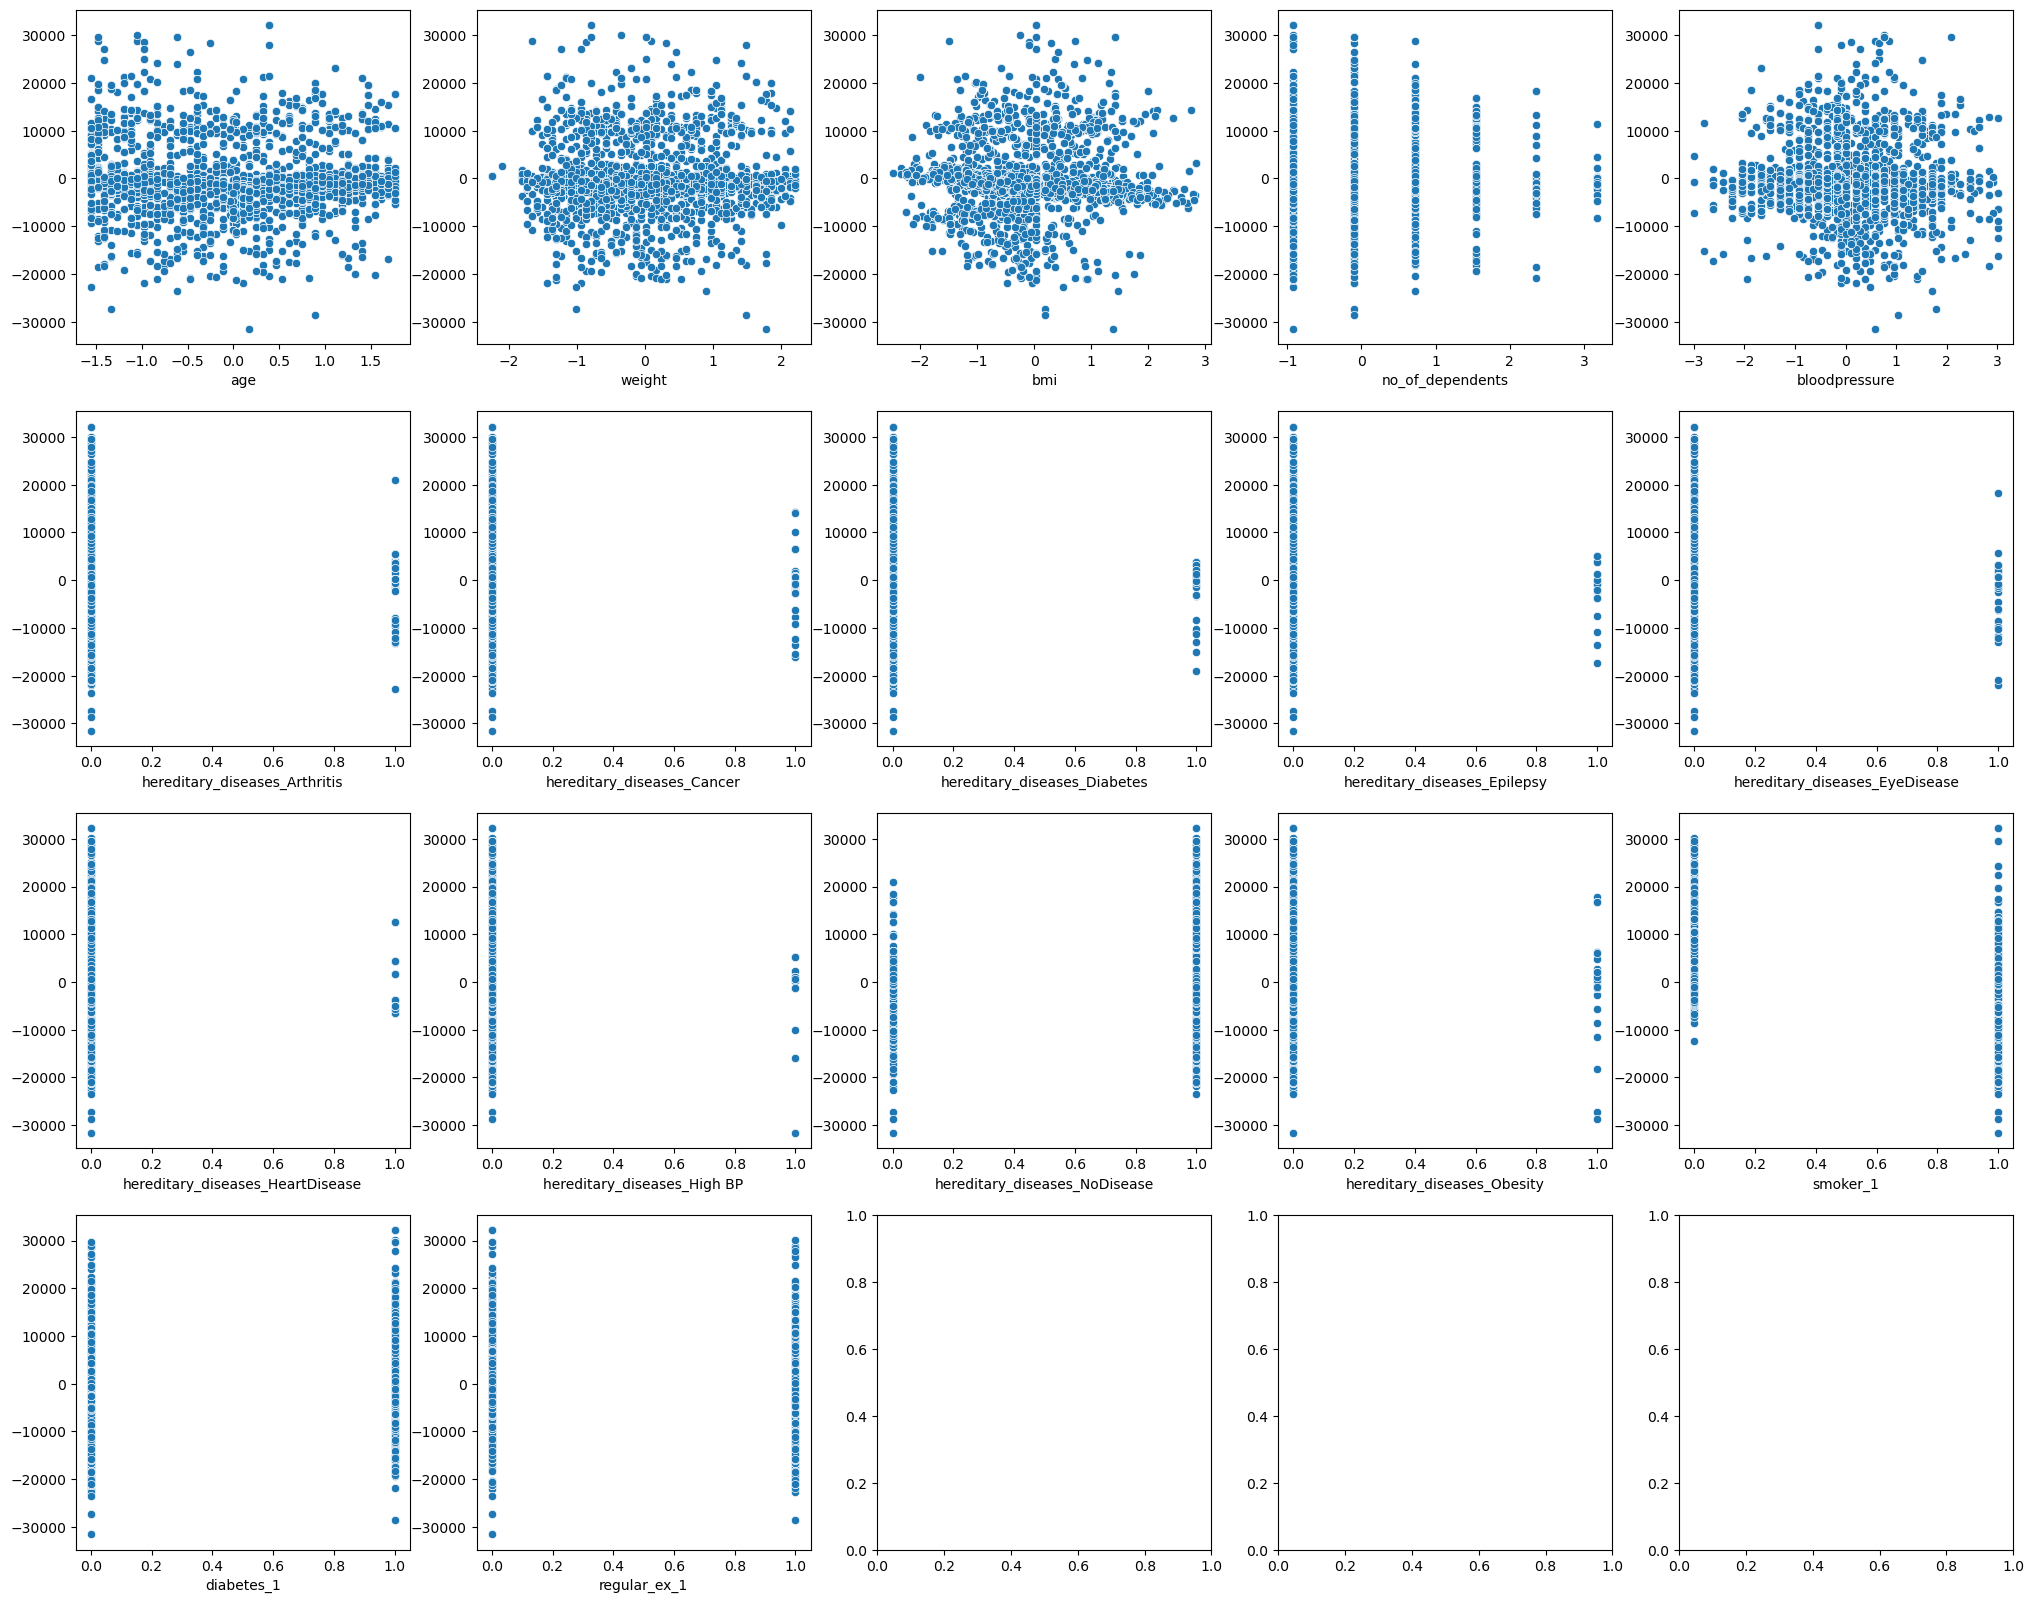

In [192]:
fig, ax = plt.subplots(nrows = 4, ncols= 5, figsize=(25, 20))
 
for variable, subplot in zip(X_train_significant.columns[1:], ax.flatten()):
    sns.scatterplot(x=X_train_significant[variable], y=linreg_model_with_significant_var.resid , ax=subplot)

plt.show()

From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.

<a id='Normality_of_Residuals'></a>
### 5.3.2.4 Normality of Residuals

The assumption of normality is an important assumption for many statistical tests. The normal Q-Q plot is one way to assess normality. This q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.

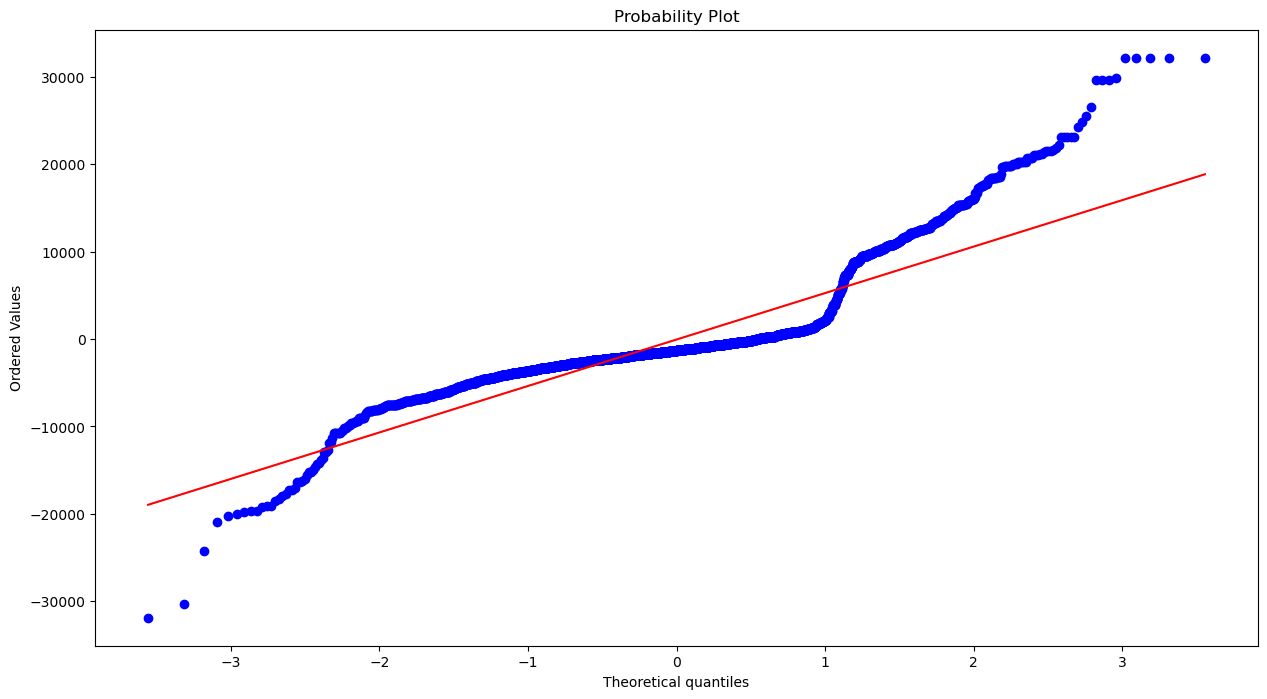

In [193]:
# calculate fitted values
fitted_vals = linreg_model_with_significant_var.predict(X_test_significant)

# calculate residuals
resids = actual_claim - fitted_vals

stats.probplot(resids, plot=plt)


plt.show()

Using this plot, we can infer that the residuals do not come from a normal distribution. Also Jarqque Bera test suggests residuals do not come from a normal distribution.
This is possible since our target variable is not normally distributed.

### 5.3.4 Linear Regression with Interaction (OLS)


**1. Compute the interaction effect**

In [194]:
# Bsed on domain knowledge - possible interaction between bmi and smoker
# create a copy of the entire dataset to add the interaction effect using copy()
df_insurance_interaction = df_insurance_dummy.copy()

# add the interaction variable
df_insurance_interaction['bmi*smoker'] = df_insurance_interaction['bmi']*df_insurance_interaction['smoker_1'] 
#df_insurance_interaction.head()

**2. Split the data into training and test sets**


In [195]:
# separate the independent and dependent variables

X = df_insurance_interaction.drop(['claim','log_claim'], axis=1)
y = df_insurance_interaction['claim']

# split data into train subset and test subset for predictor and target variables
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

# check the dimensions of the train & test subset for 
print("The shape of X_train_interaction is:",X_train_interaction.shape)
print("The shape of X_test_interaction is:",X_test_interaction.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (11042, 57)
The shape of X_test_interaction is: (3681, 57)
The shape of y_train is: (11042,)
The shape of y_test is: (3681,)


**3. Build model using sm.OLS().fit()**

In [196]:
# building a full model with an interaction term using OLS()
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()

# print the summary output
print(linreg_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     796.1
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:59:54   Log-Likelihood:            -1.1055e+05
No. Observations:               11042   AIC:                         2.212e+05
Df Residuals:                   10985   BIC:                         2.216e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**4. Predict the values using test set**

In [197]:
# predict the 'claim' using predict()
predicted_claim = linreg_with_interaction.predict(X_test_interaction)

# extract the 'claim' values from the test data
actual_claim = y_test

**5. Compute model accuracy measures**


In [198]:
# calculate rmse using rmse()
linreg_with_interaction_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_with_interaction_rsquared = linreg_with_interaction.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj 

**6. Tabulate the results**

In [199]:
# compile the required information
linreg_with_interaction_metrics = pd.Series({
                     'Model_Name': "linreg_with_interaction",
                     'RMSE': linreg_with_interaction_rmse,
                     'R-Squared': linreg_with_interaction_rsquared,
                     'Adj. R-Squared': linreg_with_interaction_rsquared_adj
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_with_interaction_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
1,Linreg full model with significant variables,0.760924,0.760555,5911.155096
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
3,Linreg full model with significant variables,0.760924,0.760555,5911.155096
4,linreg_with_interaction,0.802319,0.801311,5547.061558


## 6. Regularization (OLS)

### 6.1 Ridge Regression (OLS)

**1. Define train and test sets**

In [200]:
print("The shape of X_train_interaction is:",X_train_interaction.shape)
print("The shape of X_test_interaction is:",X_test_interaction.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (11042, 57)
The shape of X_test_interaction is: (3681, 57)
The shape of y_train is: (11042,)
The shape of y_test is: (3681,)


In [201]:
X_train_interaction_No_const = X_train_interaction.drop('const', axis=1)
X_test_interaction_No_const = X_test_interaction.drop('const', axis=1)

# check shate after drop of constant
print("The shape of X_train_interaction is:",X_train_interaction_No_const.shape)
print("The shape of X_test_interaction is:",X_test_interaction_No_const.shape)

The shape of X_train_interaction is: (11042, 56)
The shape of X_test_interaction is: (3681, 56)


**2. Perform Grid Search to identify Best Parameter**

We first create a list of all the variable names and accuracy metrics whose values we want.

In [202]:
# Define parameter grid
param = {'alpha':[0.01, 0.1, 0.5, 1, 2,3,4]}

# Create instance of algorithm
algo_name = Ridge()

grid_cv = GridSearchCV(estimator=algo_name, param_grid= param, cv=5, scoring='r2' )
grid_cv.fit(X_train_interaction_No_const, y_train)
grid_cv.best_params_

{'alpha': 2}

**3. Build model with Best Parameters**

In [203]:
# build Ridge model with best parameter from grid search

# Use Normalize=True
ridge_regression = Ridge(alpha=2)
ridge_model = ridge_regression.fit(X_train_interaction_No_const, y_train)


**4. Predict the values using test set**

In [204]:
# predict the scaled claim using predict()
train_predicted_claim = ridge_model.predict(X_train_interaction_No_const)
predicted_claim = ridge_model.predict(X_test_interaction_No_const)

# extract the 'claim' values from the test data
actual_claim = y_test

**5. Compute model accuracy measures**



In [205]:
# calculate rmse using rmse()
ridge_regression_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
ridge_regression_rsquared = r2_score(y_train, train_predicted_claim)
# ridge_regression_test_rsquared = test_r2 = r2_score(actual_claim, predicted_claim)

# calculate Adjusted R-Squared using rsquared_adj 
# compute number of observations
n = X_train_interaction_No_const.shape[0]
# compute number of independent variables
k = X_train_interaction_No_const.shape[1]
ridge_regression_rsquared_adj = 1 - (1 - ridge_regression_rsquared)*(n-1)/(n-k-1)


**6. Tabulate the results**

In [206]:
# compile the required information
ridge_regression_metrics = pd.Series({
                     'Model_Name': "Ridge Regression with Interaction",
                     'RMSE': ridge_regression_rmse,
                     'R-Squared': ridge_regression_rsquared,
                     'Adj. R-Squared': ridge_regression_rsquared_adj
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(ridge_regression_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
1,Linreg full model with significant variables,0.760924,0.760555,5911.155096
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
3,Linreg full model with significant variables,0.760924,0.760555,5911.155096
4,linreg_with_interaction,0.802319,0.801311,5547.061558
5,Ridge Regression with Interaction,0.802299,0.801291,5545.691392


### 6.2 Lasso Regression (OLS)

**1. Define train and test sets**

We already have Train and Test data defined during Ridge


**2. Perform Grid Search to identify Best Parameter**

In [207]:
# Define parameter grid
param = {'alpha':[0.001, 0.01, 0.1, 0.5, 1]}

# Create instance of algorithm
algo_name = Lasso()

grid_cv = GridSearchCV(estimator=algo_name, param_grid= param, cv=5, scoring='r2' )
grid_cv.fit(X_train_interaction, y_train)
grid_cv.best_params_

{'alpha': 0.5}

**3. Build model with Best Parameters**

In [208]:
# Build Lassso model
lasso_regression = Lasso(alpha=0.5)
lasso_model = lasso_regression.fit(X_train_interaction_No_const, y_train)


**4. Predict the values using test set**

In [209]:
# predict the scaled claim using predict()
train_predicted_claim = lasso_model.predict(X_train_interaction_No_const)
predicted_claim = lasso_model.predict(X_test_interaction_No_const)

# extract the 'claim' values from the test data
actual_claim = y_test

**5. Compute model accuracy measures**



In [210]:
# calculate rmse using rmse()
lasso_regression_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
lasso_regression_rsquared = r2_score(y_train, train_predicted_claim)
# lasso_regression_test_rsquared = test_r2 = r2_score(actual_claim, predicted_claim)

# calculate Adjusted R-Squared using rsquared_adj 
# compute number of observations
n = X_train_interaction_No_const.shape[0]
# compute number of independent variables
k = X_train_interaction_No_const.shape[1]
lasso_regression_rsquared_adj = 1 - (1 - lasso_regression_rsquared)*(n-1)/(n-k-1)


**6. Tabulate the results**

In [211]:
# compile the required information
lasso_regression_metrics = pd.Series({
                     'Model_Name': "Lasso Regression with Interaction",
                     'RMSE': lasso_regression_rmse,
                     'R-Squared': lasso_regression_rsquared,
                     'Adj. R-Squared': lasso_regression_rsquared_adj
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(lasso_regression_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
1,Linreg full model with significant variables,0.760924,0.760555,5911.155096
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
3,Linreg full model with significant variables,0.760924,0.760555,5911.155096
4,linreg_with_interaction,0.802319,0.801311,5547.061558
5,Ridge Regression with Interaction,0.802299,0.801291,5545.691392
6,Lasso Regression with Interaction,0.802305,0.801298,5545.256617


### 6.2 ElasticNet Regression

**1. Define train and test sets**

We already have Train and Test data defined during Ridge

**2. Perform Grid Search to identify Best Parameter**

In [212]:
# Define parameter grid
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 0.5, 1],
         'l1_ratio':[0.01,0.1,0.3,0.5,0.7, 0.9, 1]}

# Create instance of algorithm
algo_name = ElasticNet()

grid_cv = GridSearchCV(estimator=algo_name, param_grid= param, cv=5, scoring='r2' )
grid_cv.fit(X_train_interaction, y_train)
grid_cv.best_params_

{'alpha': 0.5, 'l1_ratio': 1}

**3. Build model with Best Parameters**

In [213]:
# build Gidge model with best parameter from grid search

# Use Normalize=True
elasticnet_regression = ElasticNet(alpha=0.5, l1_ratio=1)
elasticnet_model = elasticnet_regression.fit(X_train_interaction_No_const, y_train)


**4. Predict the values using test set**

In [214]:
# predict the scaled claim using predict()
train_predicted_claim = elasticnet_model.predict(X_train_interaction_No_const)
predicted_claim = elasticnet_model.predict(X_test_interaction_No_const)

# extract the 'claim' values from the test data
actual_claim = y_test

**5. Compute model accuracy measures**



In [215]:
# calculate rmse using rmse()
elasticnet_regression_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
elasticnet_regression_rsquared = r2_score(y_train, train_predicted_claim)
# elasticnet_regression_test_rsquared = test_r2 = r2_score(actual_claim, predicted_claim)

# calculate Adjusted R-Squared using rsquared_adj 
# compute number of observations
n = X_train_interaction_No_const.shape[0]
# compute number of independent variables
k = X_train_interaction_No_const.shape[1]
elasticnet_regression_rsquared_adj = 1 - (1 - elasticnet_regression_rsquared)*(n-1)/(n-k-1)


**6. Tabulate the results**

In [216]:
# compile the required information
elasticnet_regression_metrics = pd.Series({
                     'Model_Name': "ElasticNet Regression with Interaction",
                     'RMSE': elasticnet_regression_rmse,
                     'R-Squared': elasticnet_regression_rsquared,
                     'Adj. R-Squared': elasticnet_regression_rsquared_adj
                   })


score_card = score_card.append(elasticnet_regression_metrics, ignore_index = True)


score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
1,Linreg full model with significant variables,0.760924,0.760555,5911.155096
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
3,Linreg full model with significant variables,0.760924,0.760555,5911.155096
4,linreg_with_interaction,0.802319,0.801311,5547.061558
5,Ridge Regression with Interaction,0.802299,0.801291,5545.691392
6,Lasso Regression with Interaction,0.802305,0.801298,5545.256617
7,ElasticNet Regression with Interaction,0.802305,0.801298,5545.256617


<a id='rmse_and_r-squared'></a>
## 8. Conclusion and Interpretation

To take the final conclusion, let us recall the result table again

In [217]:
# view the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
1,Linreg full model with significant variables,0.760924,0.760555,5911.155096
2,Linreg full model without log of target variable,0.765424,0.764249,5916.234909
3,Linreg full model with significant variables,0.760924,0.760555,5911.155096
4,linreg_with_interaction,0.802319,0.801311,5547.061558
5,Ridge Regression with Interaction,0.802299,0.801291,5545.691392
6,Lasso Regression with Interaction,0.802305,0.801298,5545.256617
7,ElasticNet Regression with Interaction,0.802305,0.801298,5545.256617


**Let visualize graphically the above table**

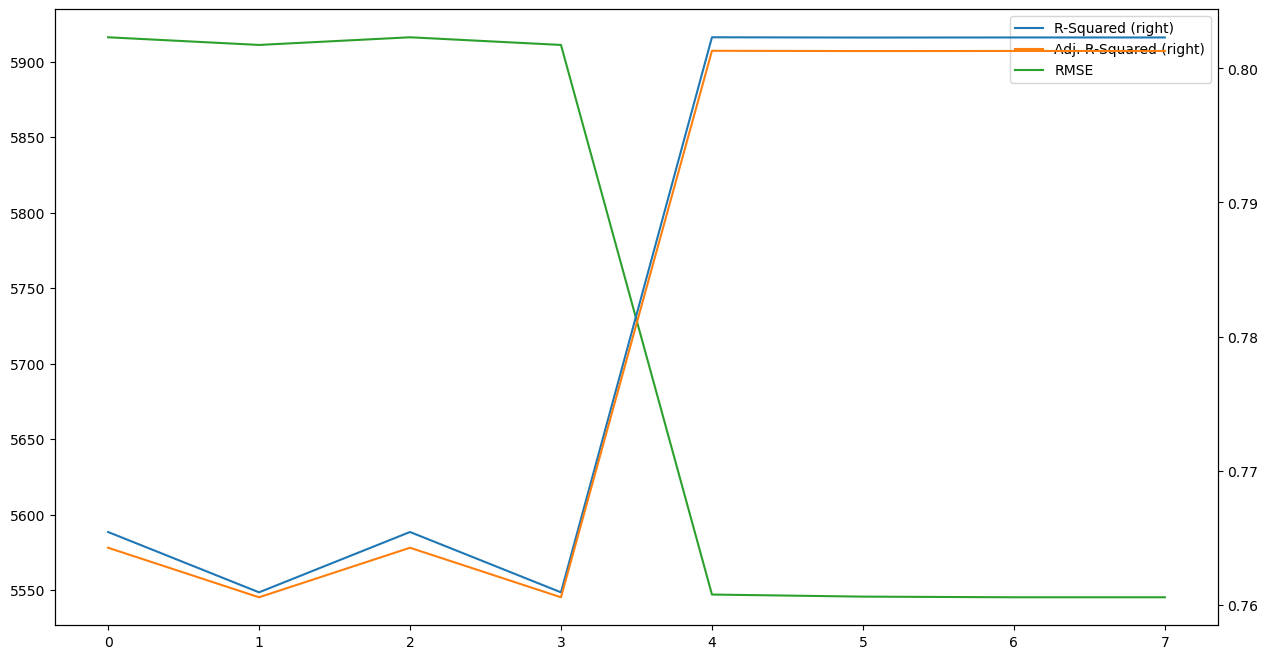

In [218]:
# plot the accuracy measure for all models

score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])


plt.show()